In [ ]:
import pandas as pd
import warnings
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV, \
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [ ]:
df =pd.read_csv('train.csv')


for i,col_name in enumerate(df.columns):
  print(df.columns[i],df[col_name].unique())




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df.select_dtypes()

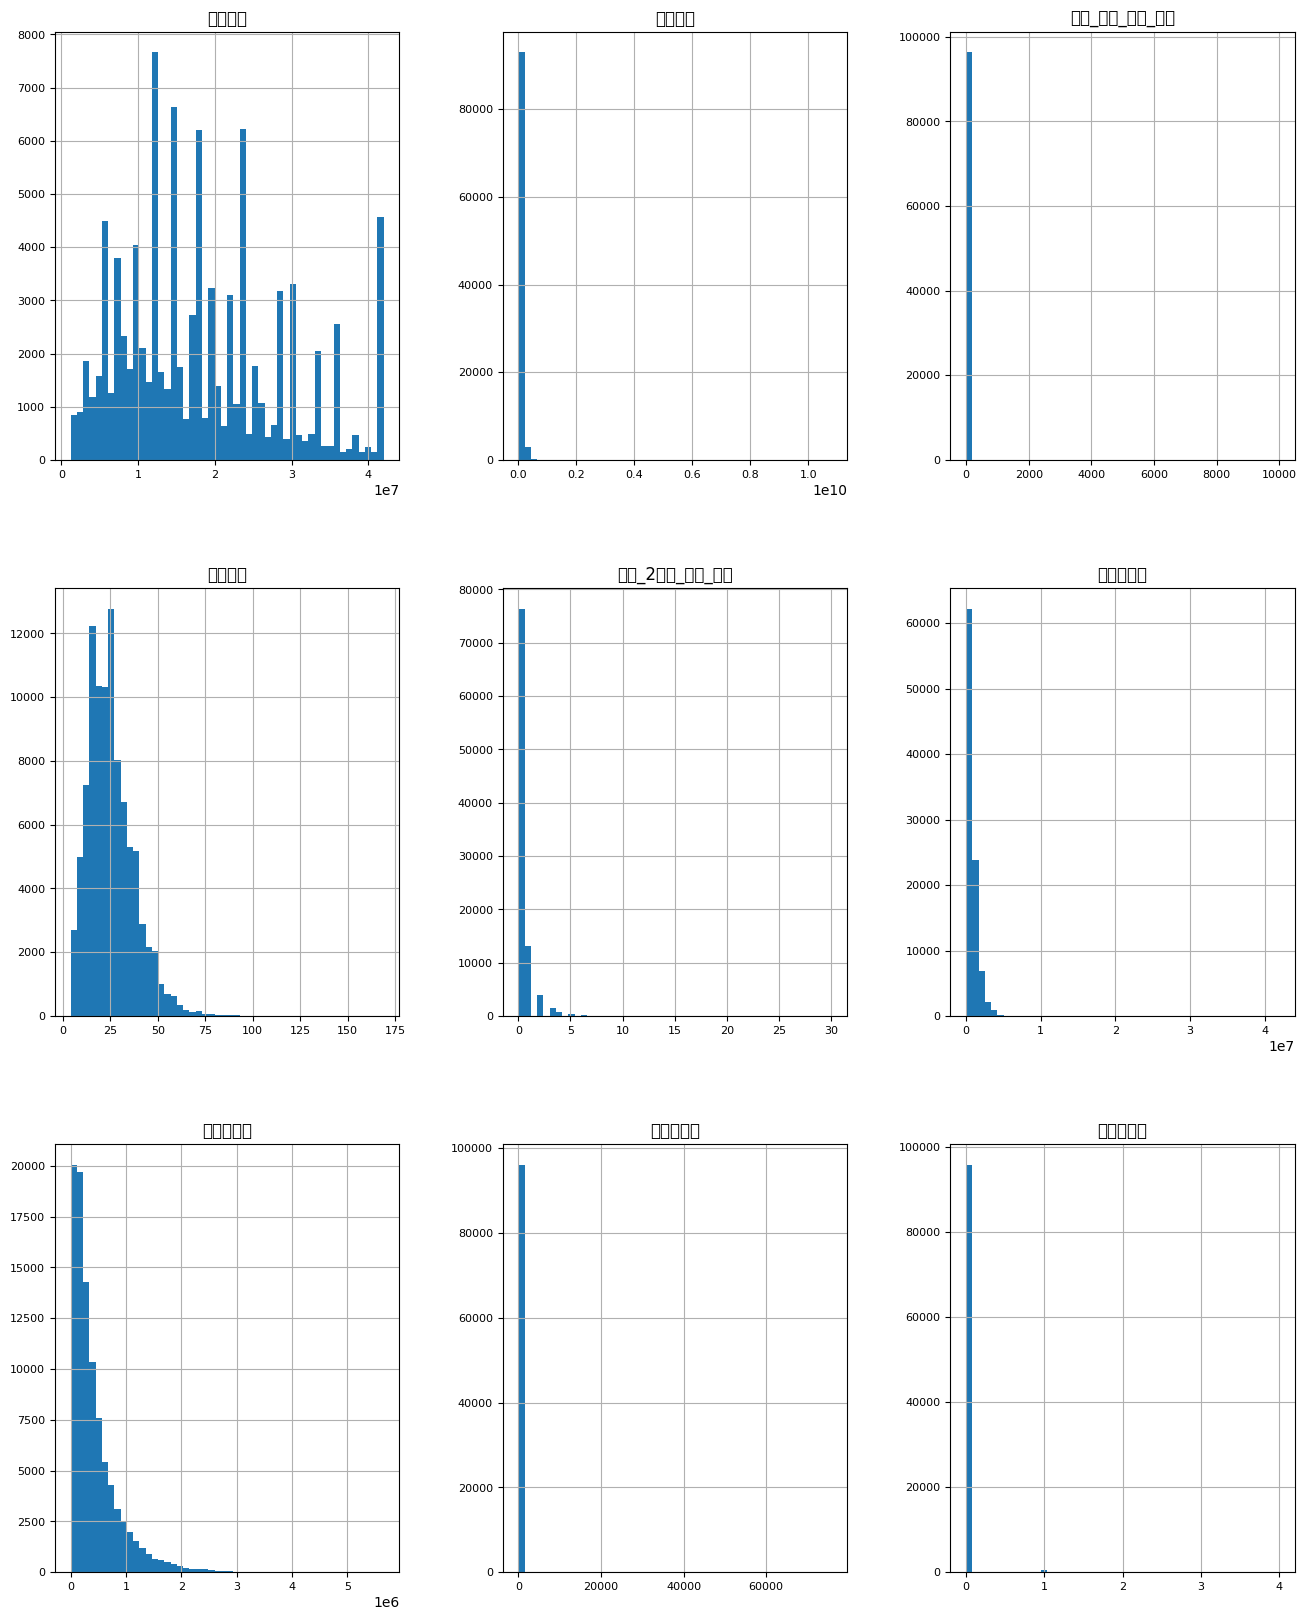

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [ ]:
min(df['연간소득'])

0

In [ ]:
df = df[~df['근로기간'].isin(['Unknown'])]
print(df.head(1))
df=df.drop(columns=['총계좌수','연체계좌수','대출목적'])
new_columns = {"대출금액": "loan_amount",'대출기간':'loan_period','근로기간':'working_year','주택소유상태':'property','연간소득':'incomeyear','부채_대비_소득_비율':'DTI','대출목적':'purpose_loan','최근_2년간_연체_횟수':'overdue_num','총상환원금':'total_repayment','총상환이자':'total_interest','총연체금액':'overdue_amount','대출등급':'Rank'}
df.rename(columns = new_columns,inplace=True)

df=df.drop(columns=['ID'])
df['property'] = df['property'].apply(lambda t: {np.nan:-1, 'RENT':1, 'MORTGAGE':2, 'OWN':3, 'ANY':4}[t]).astype(np.int8)
#df['loan_period'] = df['loan_period'].apply(lambda x: re.sub(r'\D', '', x))
#df['working_year'] = df['working_year'].apply(lambda x: re.sub(r'\D', '', x))
#r'\D' 숫자가 아닌 모든 문자
#df['working_year_numeric'] = df['working_year'].str.extract('(\d+)')




            ID      대출금액        대출기간     근로기간 주택소유상태      연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  12480000   36 months  6 years   RENT  72000000         18.9   

   총계좌수   대출목적  최근_2년간_연체_횟수  총상환원금  총상환이자  총연체금액  연체계좌수 대출등급  
0    15  부채 통합             0      0    0.0    0.0    0.0    C  


In [ ]:
df['working_year'].unique()

array(['6 years', '10+ years', '5 years', '8 years', '9 years', '2 years',
       '1 year', '3 years', '7 years', '4 years', '< 1 year', '10+years',
       '<1 year', '3', '1 years'], dtype=object)

In [ ]:
df['working_year'] = df['working_year'].apply(lambda x: '10+years' if x == '10+ years' else x)
df['working_year'] = df['working_year'].apply(lambda x: '<1 year' if x == '< 1 year' else x)
df['working_year'] = df['working_year'].apply(lambda x: '1 years' if x == '1 year' else x)


In [ ]:
df['working_year'].unique()

array(['6 years', '10+years', '5 years', '8 years', '9 years', '2 years',
       '1 years', '3 years', '7 years', '4 years', '<1 year', '3'],
      dtype=object)

In [ ]:


# 가상의 데이터 생성
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 수행
df['loan_period'] = label_encoder.fit_transform(df['loan_period'])
df['working_year'] = label_encoder.fit_transform(df['working_year'])
df['overdue_amount'] = label_encoder.fit_transform(df['overdue_amount'])
df['Rank'] = label_encoder.fit_transform(df['Rank'])


In [ ]:
df.isna().sum()

loan_amount        0
loan_period        0
working_year       0
property           0
incomeyear         0
DTI                0
overdue_num        0
total_repayment    0
total_interest     0
overdue_amount     0
Rank               0
dtype: int64

In [ ]:
X = df.drop(columns = ['Rank'])
y = df.Rank

In [ ]:
df.Rank.unique()

array([2, 1, 0, 3, 5, 6, 4])

In [ ]:
RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
xtr, xtest, ytr, ytest = \
train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:


dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [ ]:
num = {}
for i in df['Rank']:
    num[i] = num.get(i, 0) + 1

print(num)

print(len(df['Rank']))

{2: 25995, 1: 27075, 0: 15838, 3: 12482, 5: 1862, 6: 395, 4: 6976}
90623


User
XGBClassifier 클래스의 모든 주요 매개변수는 다음과 같습니다:

booster (부스터 유형):

트리 부스팅 모델의 종류를 지정합니다. "gbtree"는 트리 기반 부스팅을, "gblinear"는 선형 모델 기반 부스팅을, "dart"는 향상된 부스팅을, "gpu_hist"는 GPU 지원 히스토그램 기반 부스팅을 나타냅니다. 기본값은 "gbtree"입니다.
n_estimators (트리의 개수):

부스팅 프로세스에서 생성할 트리의 총 개수입니다.
learning_rate (학습률):

각 트리의 기여도를 제어하는 학습률입니다.
max_depth (트리의 최대 깊이):

각 트리의 최대 깊이를 제한하여 과적합을 방지합니다.
subsample (트리를 훈련할 때 사용하는 데이터의 일부):

각 트리를 훈련할 때 사용할 데이터의 비율을 지정합니다.
colsample_bytree (각 트리에서 사용할 특성의 비율):

각 트리를 훈련할 때 사용할 특성의 비율을 지정합니다.
gamma (트리 분할을 위한 최소 손실 감소량):

이 값보다 손실이 적게 감소하는 분할은 수행되지 않습니다.
min_child_weight (최소 자식 노드의 가중치 합 제한):

리프 노드의 가중치 합이 이 값보다 작아야 추가 분할이 수행됩니다.
objective (최적화 목적 함수):

모델이 최적화하는 목적 함수를 지정합니다. "reg:squarederror"는 회귀, "binary:logistic"은 이진 분류, "multi:softmax"는 다중 클래스 분류 등이 있습니다.
reg_alpha (L1 정규화 강도):

가중치에 대한 L1 정규화 강도를 조절합니다.
reg_lambda (L2 정규화 강도):

가중치에 대한 L2 정규화 강도를 조절합니다.
scale_pos_weight (양성 클래스의 가중치):

불균형한 클래스 문제에 대한 가중치를 조절합니다.
base_score (기본 예측값):

초기 예측값을 설정합니다.
random_state (랜덤 시드):

모델을 재현 가능하게 만들기 위한 랜덤 시드를 지정합니다.
use_label_encoder (레이블 인코딩 사용 여부):


scale_pos_weight 계산:
scale_pos_weight는 Negative 클래스의 비율을 Positive 클래스의 비율로 나눈 값

양성 클래스가 10%의 샘플을 차지하고 음성 클래스가 90%의 샘플을 차지 scale_pos_weight는 90% / 10% = 9


In [ ]:

xgb_clf = xgb.XGBClassifier(seed=42,
                            use_label_encoder=False,
                            n_estimators=1500, #3000
                            num_boost_round=100,
                            objective='multi:softmax',
                            num_classes =7,#binary:logistic
                            gammma=1, #0.05
                            missing=None,
                            booster='gbtree',
                            scale_pos_weight=0.3,
                            min_child_weight=3, #작은 데이터셋에서는 노이즈와 이상치에 민감할수 있으니 큰값
                            learn_rate=0.02,
                            #grow_policy='lossguide',
                            max_depth =15, #작을수록 트리 간단해짐,소규모 df에는 큰 값
                            reg_lambda=3, #정규화 강화 초기값0.1~1.0
                            sub_sample = 0.7, #전체데이터 90퍼사용
                            colsample_bytree=0.7,
                            n_jobs=1)
xgb_clf.fit(xtr,
            ytr,
            verbose=True,
            eval_metric='aucpr',
            early_stopping_rounds=15,
            eval_set = [(xtest,ytest)])

[0]	validation_0-aucpr:0.67751
[1]	validation_0-aucpr:0.76991
[2]	validation_0-aucpr:0.78268
[3]	validation_0-aucpr:0.82941
[4]	validation_0-aucpr:0.83847
[5]	validation_0-aucpr:0.84419
[6]	validation_0-aucpr:0.85206
[7]	validation_0-aucpr:0.85734
[8]	validation_0-aucpr:0.86143
[9]	validation_0-aucpr:0.86511
[10]	validation_0-aucpr:0.86627
[11]	validation_0-aucpr:0.86747
[12]	validation_0-aucpr:0.86935
[13]	validation_0-aucpr:0.87015
[14]	validation_0-aucpr:0.87231
[15]	validation_0-aucpr:0.87302
[16]	validation_0-aucpr:0.87393
[17]	validation_0-aucpr:0.87521
[18]	validation_0-aucpr:0.87598
[19]	validation_0-aucpr:0.87622
[20]	validation_0-aucpr:0.87639
[21]	validation_0-aucpr:0.87639
[22]	validation_0-aucpr:0.87561
[23]	validation_0-aucpr:0.87615
[24]	validation_0-aucpr:0.87575
[25]	validation_0-aucpr:0.87585
[26]	validation_0-aucpr:0.87706
[27]	validation_0-aucpr:0.87737
[28]	validation_0-aucpr:0.87834
[29]	validation_0-aucpr:0.87865
[30]	validation_0-aucpr:0.87840
[31]	validation_0-

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gammma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.02, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=1, ...)